In [303]:
import numpy as np
from MountainCarEnv import MountainCarEnv
import matplotlib.pyplot as plot

In [304]:
env = MountainCarEnv(render_mode="rbg_array")

In [305]:
pos_space = np.linspace(-5, 2, 10)
vel_space = np.linspace(-3, 3, 2)
Q = np.zeros((11,3,3))
# Q = np.random.uniform(0, 0, (len(pos_space), len(vel_space), env.action_space.n))

In [306]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
    else:
        action_values = Q[state[0], state[1]]
        action = np.argmax(action_values)
    return action

def get_state(obs):
    pos, vel = obs
    pos_bin = np.digitize(pos, pos_space)
    vel_bin = np.digitize(vel, vel_space)
    return pos_bin, vel_bin

def run_mountain_car(explore_per = 0.5, learn=True, alpha=0.9, gamma=0.99, Q: np.ndarray = None):
    obs = env.reset()
    done = False
    totalReward = 0
    while not done:
        state = get_state(obs)
        Q_state = Q[state[0], state[1]]
        action = epsilon_greedy_policy(state, Q, explore_per)
        obs, reward, done, _ = env.step(action)
        new_state = get_state(obs)
        new_Q_state = Q[new_state[0], new_state[1]]
        totalReward += reward
        if learn:
            Q[state[0], state[1], action] = Q_state[action] + alpha * (reward + gamma * np.max(new_Q_state) - Q_state[action])
    return totalReward


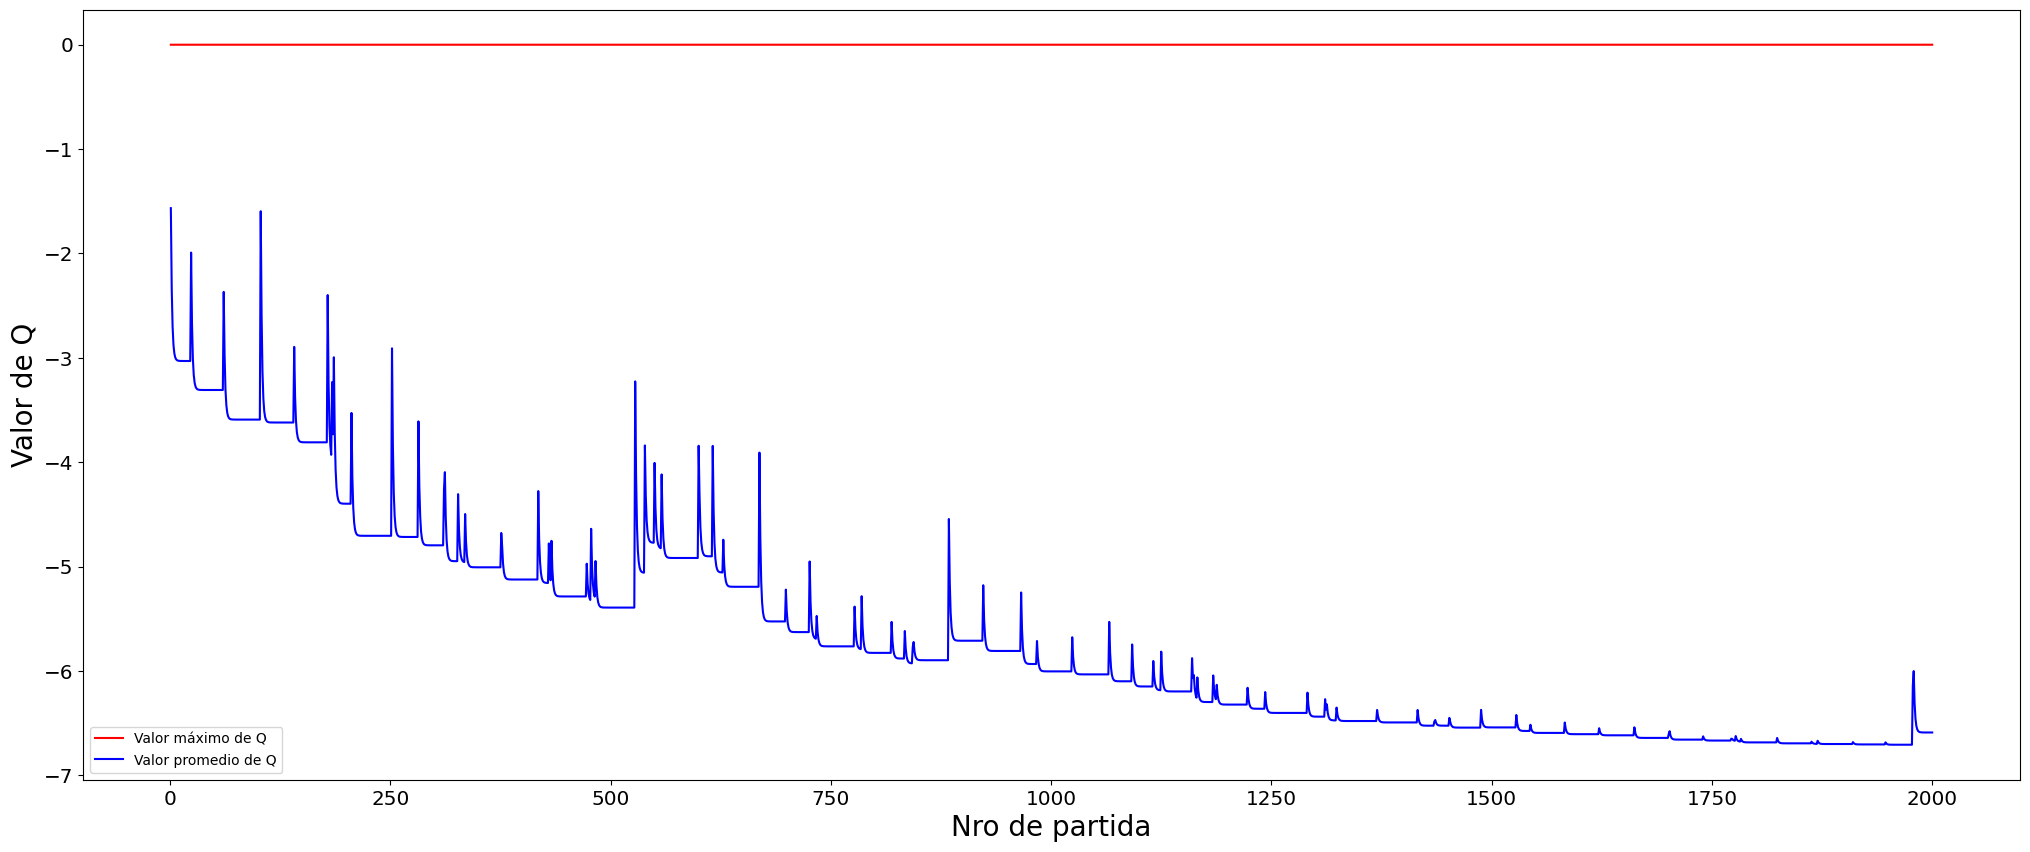

[-500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0,

In [307]:
mean_Q = []
max_Q = []
learning_rewards = []
testing_rewards = []

# Learn
for i in range(2000):
    totalReward = run_mountain_car(explore_per=0.5, learn=True, Q=Q, alpha=0.5)
    learning_rewards.append(totalReward)

    mean_Q.append(np.mean(Q))
    max_Q.append(np.max(Q))

# Test
for i in range(200):
    totalReward = run_mountain_car(explore_per=0, learn=False, Q=Q)
    testing_rewards.append(totalReward)

# Plot
plot.plot(list(range(1, len(max_Q) + 1)), max_Q, color='red', label='Valor máximo de Q')
plot.plot(list(range(1, len(mean_Q) + 1)), mean_Q, color='blue', label='Valor promedio de Q')
plot.xlabel('Nro de partida', fontsize=20)
plot.ylabel('Valor de Q', fontsize=20)
plot.rcParams["figure.figsize"] = (25, 10)
plot.rcParams['xtick.labelsize'] = 'x-large'
plot.rcParams['ytick.labelsize'] = 'x-large'
plot.legend(loc='best')
plot.show()

print(learning_rewards)

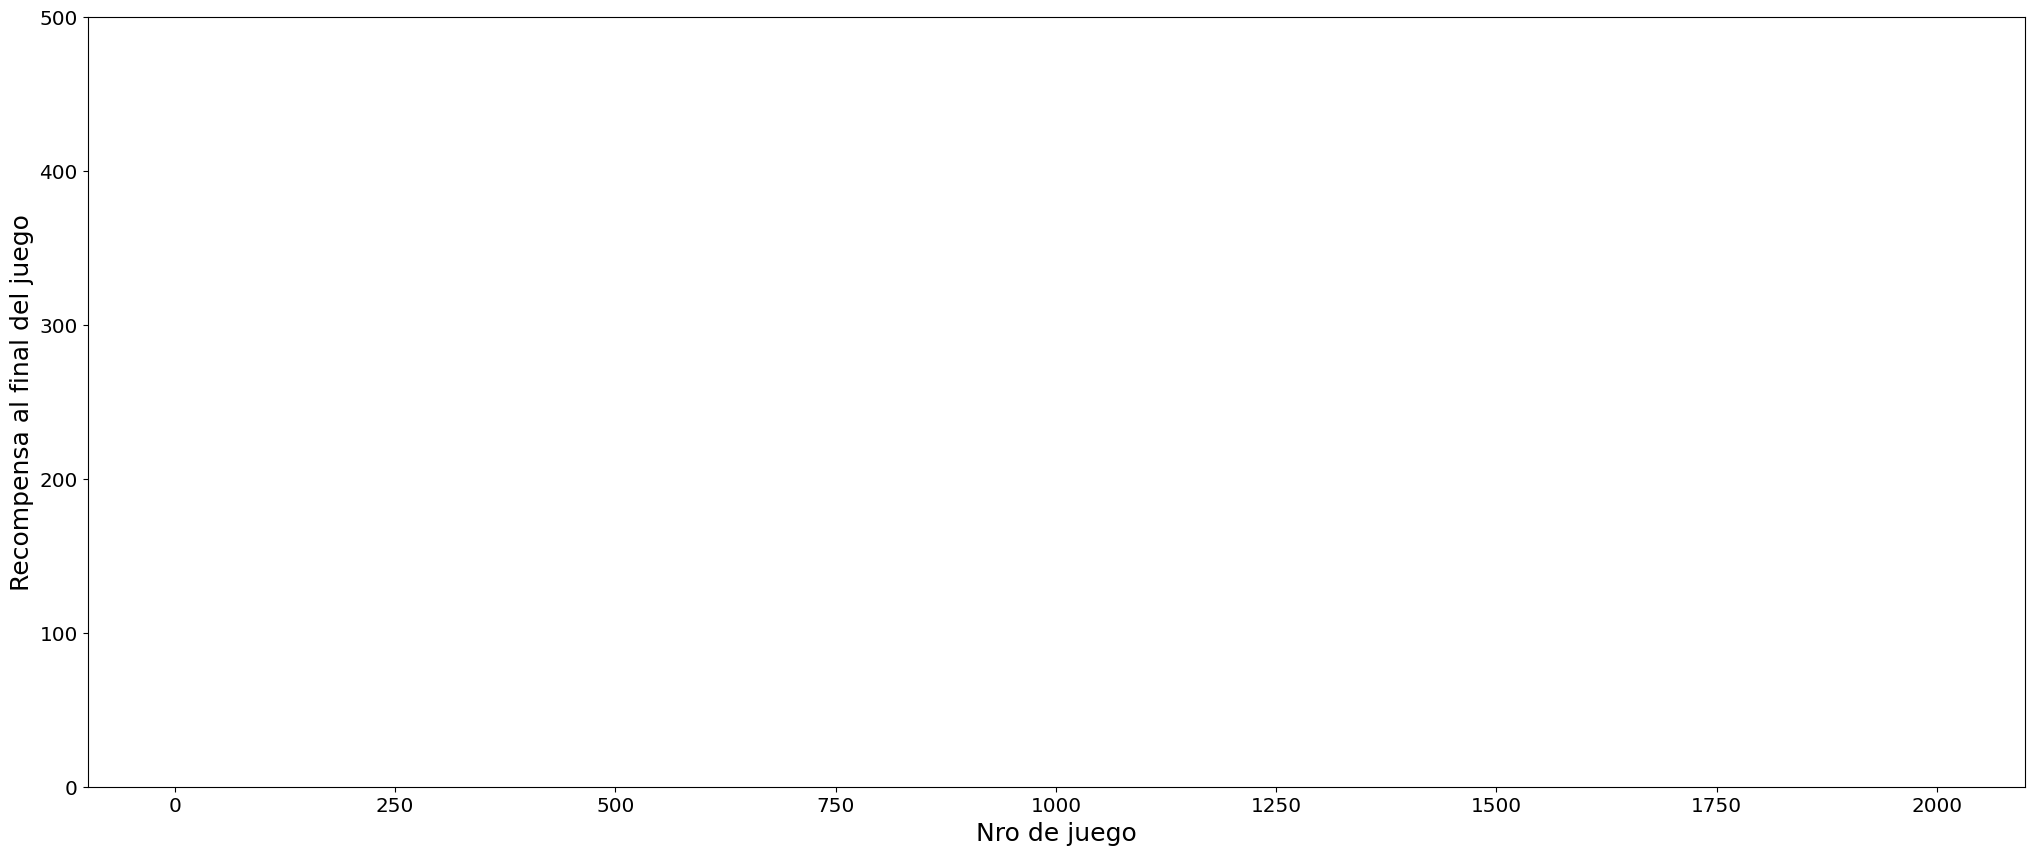

In [308]:
plot.plot(list(range(1, len(learning_rewards) + 1)), learning_rewards, color='blue')
plot.xlabel('Nro de juego', fontsize=18)
plot.ylabel('Recompensa al final del juego', fontsize=18)
plot.rcParams['xtick.labelsize'] = 'x-large'
plot.rcParams['ytick.labelsize'] = 'x-large'
plot.ylim(0, 500)
plot.show()

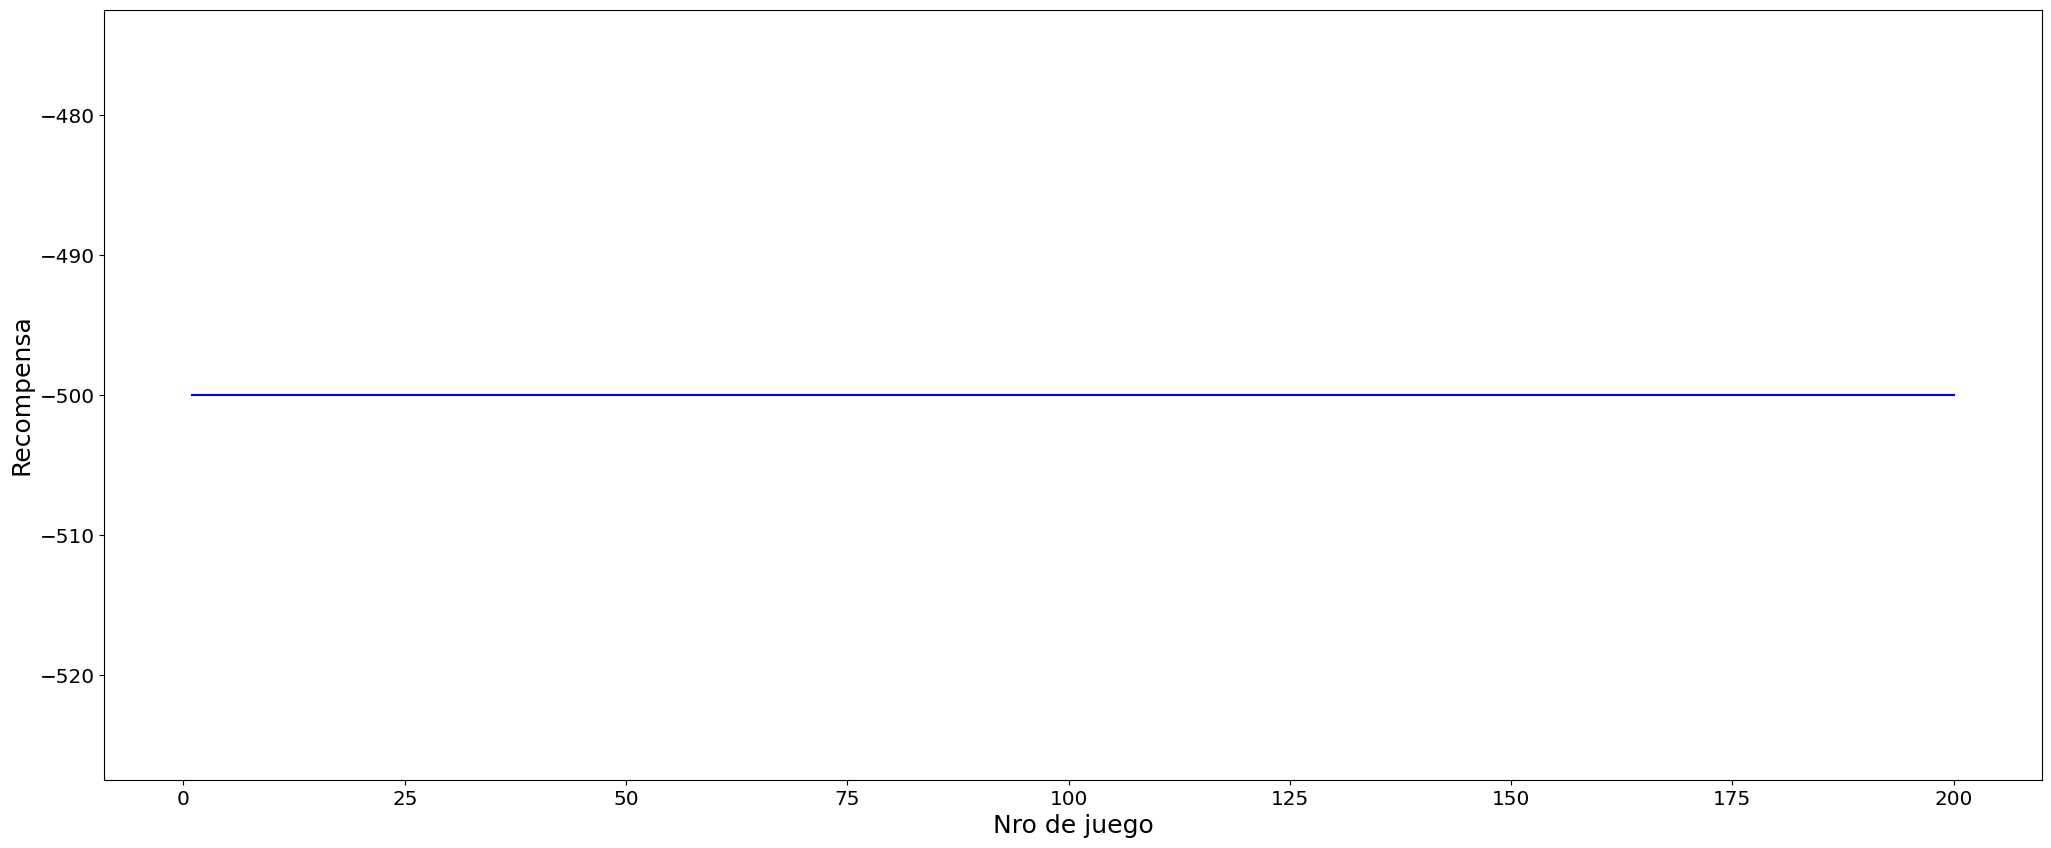

In [309]:
plot.plot(list(range(1, len(testing_rewards) + 1)), testing_rewards, color='blue')
plot.xlabel('Nro de juego', fontsize=18)
plot.ylabel('Recompensa', fontsize=18)
plot.rcParams['xtick.labelsize'] = 'x-large'
plot.rcParams['ytick.labelsize'] = 'x-large'
plot.show()

In [310]:
# import pygame

# # Initialize Pygame
# pygame.init()

# # Create a Pygame display surface
# display = pygame.display.set_mode((600, 400))

# # Your game or visualization code goes here

# # Close the existing Pygame window
# pygame.display.quit()